In [1]:
!pip install librosa
!pip install pretty_midi

In [2]:
import librosa, librosa.display

import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

from utils import *
from math_model import *

%load_ext autoreload
%autoreload 2

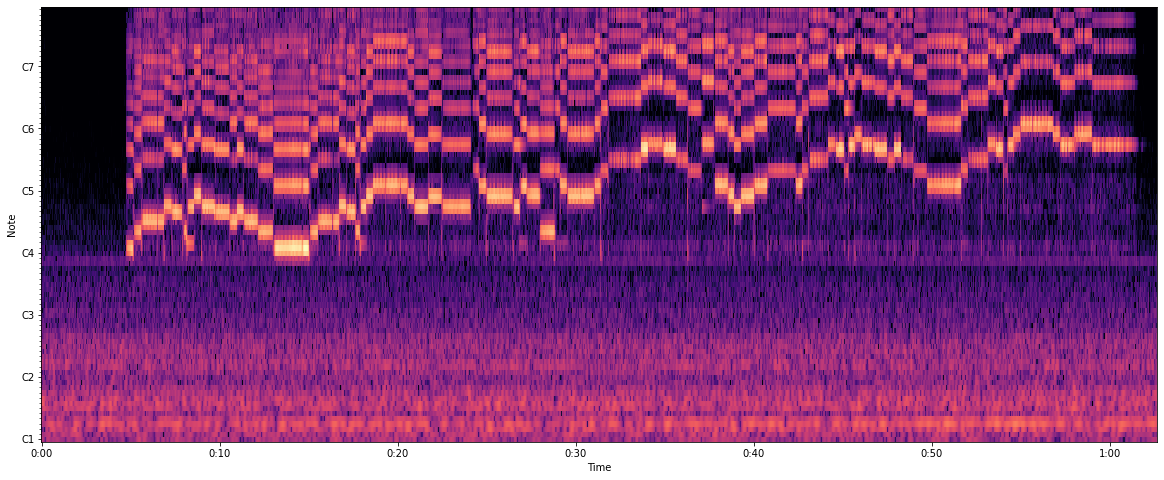

In [4]:
# Librosa method of generating sheet music
filename = "../../data/01_Jupiter_vn_vc/AuSep_1_vn_01_Jupiter.wav"
audio, rate = librosa.load(filename, mono = True)

audio = np.hstack([[0], audio])

C = np.abs(librosa.cqt(audio))

plt.figure(figsize = (20, 8))
librosa.display.specshow(librosa.amplitude_to_db(C, ref = np.max), sr=rate, x_axis='time', y_axis='cqt_note')

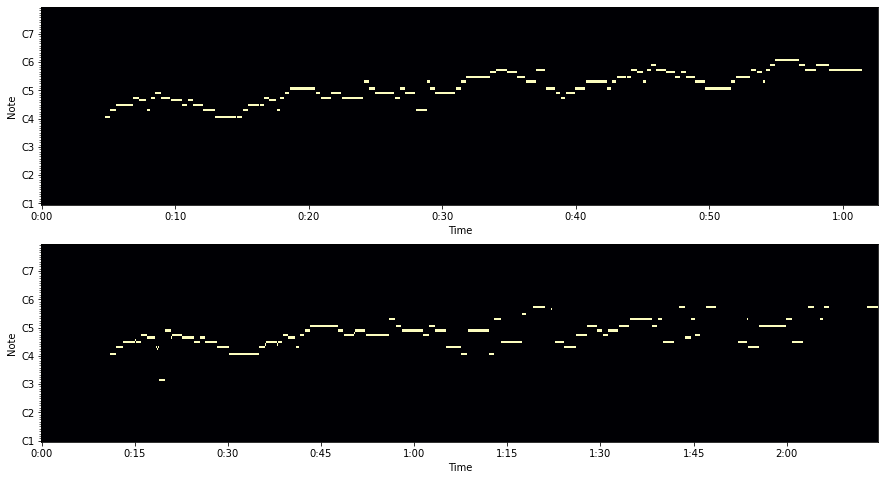

In [13]:
# Obtain the notes
notes = np.genfromtxt("../../" + filename.replace("AuSep", "Notes")[:-3] + "txt", delimiter = "\t\t")

# Convert frequency to midi (-24 due to C1 Offset)
notes[:, 1] = np.rint(librosa.hz_to_midi(notes[:, 1]) - 24)

# Convert timings to frames
notes[:, [0, 2]] = np.rint(librosa.time_to_frames(notes[:, [0, 2]], sr = rate))

# Make them integers
notes = notes.astype('int64')

onset, played = np.zeros(C.shape), np.zeros(C.shape)

for i, note in enumerate(notes):
    onset[note[1], note[0]] = 1
    played[note[1], note[0]:(note[0] + note[2])] = 1

fig, ax = plt.subplots(2, 1, figsize = (15, 8))
librosa.display.specshow(played, ax = ax[0], sr=rate, x_axis='time', y_axis='cqt_note')

midi = librosaModel(audio, rate, "Violin", prob_threshold = 0.4)
librosa.display.specshow(midi.get_piano_roll()[24:108], ax = ax[1], sr=rate, x_axis='time', y_axis='cqt_note')

Outputs the midi file into a file below

In [20]:
midi.write("./testing.mid")